In [82]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#load training and testing data
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")

In [67]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,8.0500,NaN,S


In [69]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0,1,1,3101298,12.2875,NaN,S


In [70]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,0.0,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,0.0,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.0,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,0.0,8.000000,6.000000,512.329200


In [71]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,0.0,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,0.0,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.0,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,0.0,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,0.0,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,0.0,8.000000,9.000000,512.329200


In [73]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,NaN,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,NaN,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,NaN,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,NaN,0.114631,0.245489,0.182333
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,-0.057527,-0.035322,0.083081,0.114631,NaN,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,NaN,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,NaN,0.159651,0.216225,1.000000


In [75]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

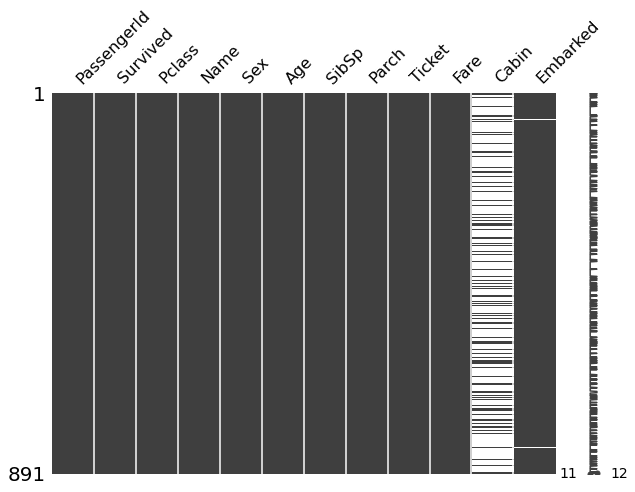

In [79]:
import missingno

missingno.matrix(train_df, figsize=(10,7))

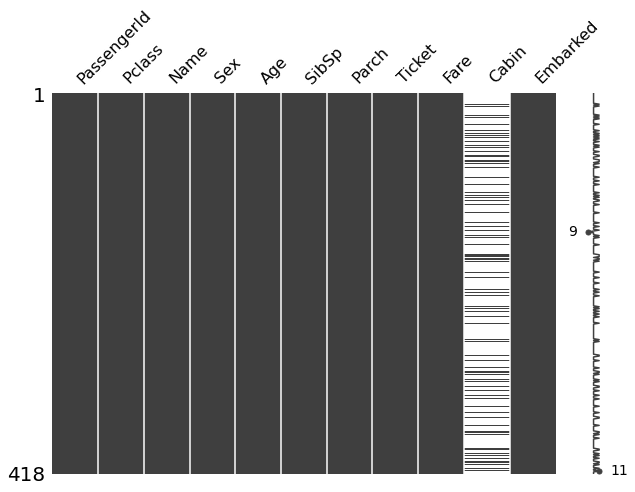

In [80]:
missingno.matrix(test_df, figsize=(10,7))

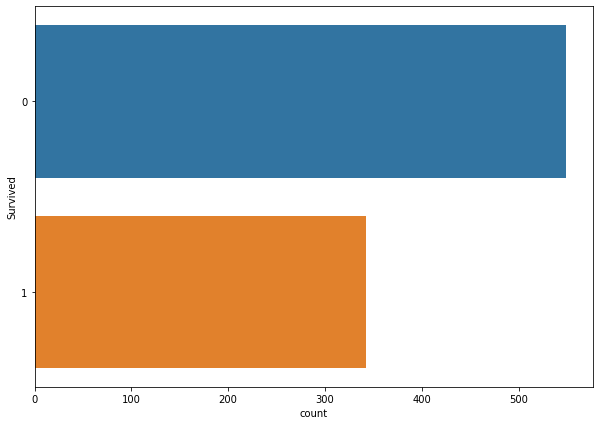

In [83]:
fig = plt.figure(figsize=(10,7))
sns.countplot(y="Survived", data=train_df)

In [76]:
test_df.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.023245,NaN,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.108615,NaN,0.001087,0.018721,-0.577147
Sex,-0.023245,-0.108615,1.000000,NaN,0.099943,0.159120,0.191514
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,0.003818,0.001087,0.099943,NaN,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,0.159120,NaN,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.191514,NaN,0.171539,0.230046,1.000000


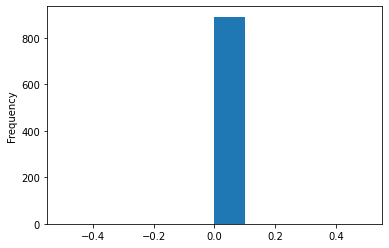

In [77]:
train_df.Age.plot.hist()

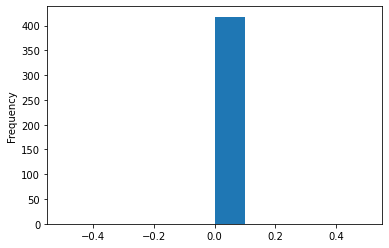

In [78]:
test_df.Age.plot.hist()

In [43]:
#change the string data to int data
sex={"male":0, "female":1}
train_df.Sex=[sex[item] for item in train_df.Sex]
test_df.Sex=[sex[item] for item in test_df.Sex]

In [56]:
#replacing null values
train_df['Age'].fillna(train_df.Age.mean(),inplace=True)
test_df['Age'].fillna(test_df.Age.mean(),inplace=True)

In [57]:
#assign datatype as integer
train_df.Age=train_df.Age.astype(int)
test_df.Age=test_df.Age.astype(int)

In [58]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [59]:
Class_counts=train_df['Pclass'].value_counts()  
p_Class=Class_counts/len(train_df)

Sex_counts=train_df['Sex'].value_counts()
p_Sex=Sex_counts/len(train_df)

Age_counts=train_df['Age'].value_counts()
p_Age=Age_counts/len(train_df)

# Survival probabilities and Death probabilities
y_counts=train_df['Survived'].value_counts()
p_y=y_counts/len(train_df)
df_survived=train_df.loc[train_df['Survived'] == 1]
df_died=train_df.loc[train_df['Survived'] == 0]

# Conditional probabilities
class_survived_counts=df_survived['Pclass'].value_counts()  
p_class_survived=class_survived_counts/len(df_survived)
class_died_counts=df_died['Pclass'].value_counts()  
p_class_died=class_died_counts/len(df_died)

#sex survived
sex_survived_counts=df_survived['Sex'].value_counts()  
p_sex_survived=sex_survived_counts/len(df_survived)
sex_died_counts=df_died['Sex'].value_counts()  
p_sex_died=sex_died_counts/len(df_died)

#Age survived
age_survived_counts=df_survived['Age'].value_counts()  
p_age_survived=age_survived_counts/len(df_survived)
age_died_counts=df_died['Age'].value_counts()  
p_age_died=age_died_counts/len(df_died)

In [60]:
def Bayes(py, px1y, px2y, px3y, px1, px2, px3):
    numerator=px1y*px2y*px3y*py
    denominator=px1*px2*px3
    p=numerator/denominator
    return p

In [61]:
result_array=[]

for i in range(0,418):
    feature_class=test_df.iloc[i]['Pclass']
    feature_sex=test_df.iloc[i]['Sex']
    feature_age=test_df.iloc[i]['Age']
    
    P_Y1=Bayes(p_y[1], p_class_survived[feature_class], p_sex_survived[feature_sex], p_age_survived[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    P_Y0=Bayes(p_y[0], p_class_died[feature_class], p_sex_died[feature_sex], p_age_died[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    
    if P_Y0 > P_Y1:
        result=0
    else:
        result=1
        
    result_array.append(result)


output = pd.DataFrame({'PassengerId': test_df.PassengerId,'Survived': result_array})
# output.to_csv('submission.csv', index=False)

In [62]:
def accuracy(actual_labels,predicted_labels):
  score=0
  for i,j in zip(actual_labels,predicted_labels):
    if i==j:
      score=score+1
  accuracy=score/len(actual_labels)
  return accuracy

In [63]:
gender_sum=pd.read_csv('/content/gender_submission.csv')
gender_sum

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
gender_sum

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
print(round(accuracy(gender_sum.drop(columns=['PassengerId']).values.tolist(),output.drop(columns=['PassengerId']).values.tolist()),5))

0.99761
